# Unzip files

In [ ]:
import zipfile
import os
import shutil
import glob
import pandas as pd
import numpy as np

def unzip_files(zip_file_path):

  destination_folder = zip_file_path.split('.zip')[0]

  # Create the destination folder if it doesn't exist
  if not os.path.exists(destination_folder):
      os.makedirs(destination_folder)

  # Open the zip file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      # Extract all contents to the destination folder
      zip_ref.extractall(destination_folder)

  print(f"Contents of '{zip_file_path}' extracted to '{destination_folder}'.")

In [ ]:
unzip_files('audio.zip')
# unzip_files('synthesized_audios.zip')

Contents of 'audio.zip' extracted to 'audio'.


# Prepare metadata

In [ ]:
metadata_Spanish = pd.read_csv('audio/Spanish_metadata.csv')
metadata_Spanish = metadata_Spanish.assign(Dataset='Spanish')

metadata_test = pd.read_csv('audio/test_metadata.csv')
metadata_test = metadata_test.assign(Dataset='test')

metadata_train = pd.read_csv('audio/train_metadata.csv')
metadata_train = metadata_train.assign(Dataset='train')

metadata_real = pd.concat([metadata_Spanish, metadata_train, metadata_test])

sexes_dict = {
              # Spanish
              'locutor1': 'Male',
              'locutor2': 'Female',
              'locutor3': 'Male',
              'locutor4': 'Female',
              'locutor5': 'Male',
              'locutor6': 'Male',
              # train
              '103': 'Female',
              '1034': 'Male',
              '1040': 'Male',
              '1069': 'Female',
              '1235': 'Male',
              '1088': 'Female',
              # test
              '1089': 'Male',
              '1188': 'Male',
              '121': 'Female',
              '237': 'Female',
              '1284': 'Female',
              '1320': 'Male',
              }

metadata_real['Speaker ID'] = metadata_real['Speaker ID'].astype(str)
metadata_real['Sex'] = metadata_real['Speaker ID'].map(sexes_dict)
metadata_real

,Audio ID,Original text,Duration,Speaker ID,Dataset,Chapter ID,Utterance ID,Sex
0,locutor2_audio_364,Oyó su propio gemido.,1.578957,locutor2,Spanish,NaN,NaN,Female
1,locutor2_audio_15215_15216,"Ella se hizo a un lado, tratando de no darle t...",6.269388,locutor2,Spanish,NaN,NaN,Female
2,locutor2_audio_29797,—Es una pena que no hayamos podido volver a ve...,5.421859,locutor2,Spanish,NaN,NaN,Female
3,locutor2_audio_7682,Fue debidamente informada sobre la familia.,2.925714,locutor2,Spanish,NaN,NaN,Female
4,locutor2_audio_18383,Le pedirían a Miranda que fuera la madrina.,2.240726,locutor2,Spanish,NaN,NaN,Female
...,...,...,...,...,...,...,...,...
115,1320_122612_000007_000001,"Human natur' is weak, and it is possible we ma...",4.760000,1320,test,122612.0,000007_000001,Male
116,1320_122612_000030_000002,Pursuing the direction given by this discovery...,9.150000,1320,test,122612.0,000030_000002,Male
117,1320_122612_000035_000006,"By the Lord, it is no longer than a child's an...",4.870000,1320,test,122612.0,000035_000006,Male
118,1320_122612_000040_000001,"If anything should happen, the call will be th...",3.800083,1320,test,122612.0,000040_000001,Male


# Plots

## Violin plot: distribution of sample duration

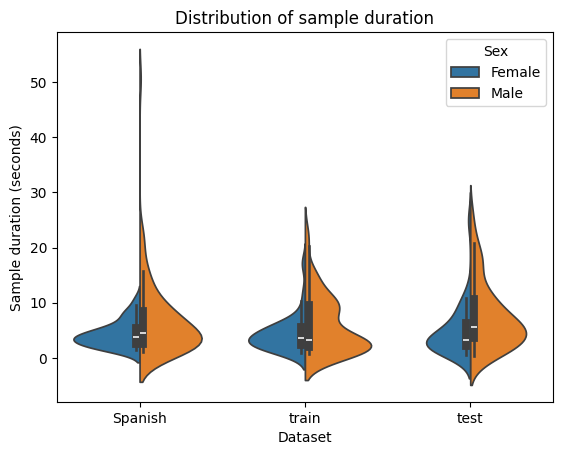

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter DataFrame by sex
male_data = metadata_real[metadata_real['Sex'] == 'Male']
female_data = metadata_real[metadata_real['Sex'] == 'Female']

# Create violin plot
plt.figure()
sns.violinplot(x='Dataset', y='Duration', hue='Sex', data=metadata_real, split=True)
plt.title('Distribution of sample duration')
plt.xlabel('Dataset')
plt.ylabel('Sample duration (seconds)')
plt.show()


## Bar plot: sample distributions

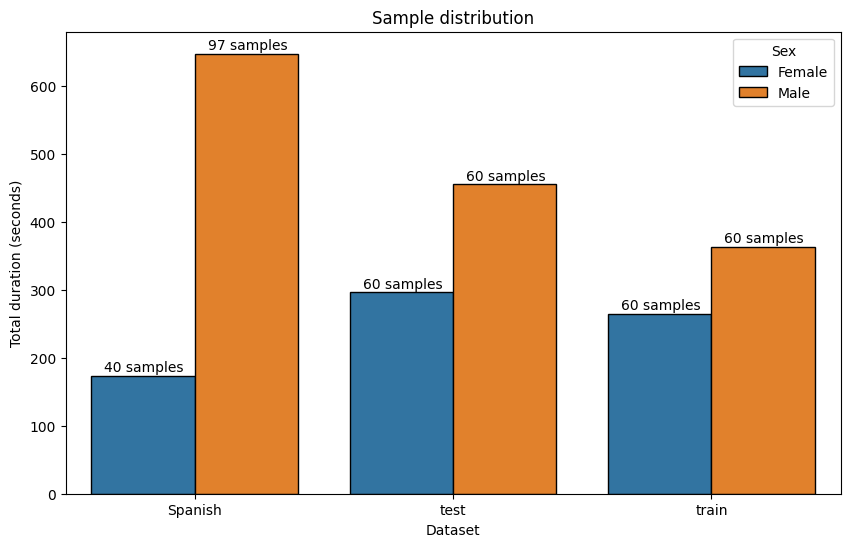

In [ ]:
import seaborn as sns

# Calculate total duration and count for each combination of dataset and sex
duration_totals = metadata_real.groupby(['Dataset', 'Sex'])['Duration'].agg(['sum', 'count']).reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='sum', hue='Sex', data=duration_totals, edgecolor='black')

positions = [-0.35, 0.05, 0.65, 1.05, 1.65, 2.05]

# Annotate each bar with the number of samples
for index, row in duration_totals.iterrows():
    plt.text(positions[index], row['sum'] + 6, f'{row["count"]}' +' samples', color='black')

plt.title('Sample distribution')
plt.xlabel('Dataset')
plt.ylabel('Total duration (seconds)')
plt.show()


In [ ]:
# @title Get SAMPLING RATE OF SPANISH AUDIOS
import wave
import time
def get_audio_sampling_rate(file_path):
    with wave.open(file_path, 'rb') as audio_file:
        frame_rate = audio_file.getframerate()

    return frame_rate

In [ ]:
get_audio_sampling_rate('/content/audio/Spanish/locutor1_audio_1375.wav')

22050

In [ ]:
metadata_real['Duration'].sum() / 60 # total mins

36.64760962773998